# Transducers

*Transducers*, also called *k-tape automata*, are finite state machines whose transitions are labeled on several tapes. The labelset of a transducer is a Cartesian product of the labelsets of each tape: $L = L_1 \times \dots \times L_k$.

Usually, it is common to manipulate 2-tape transducers, and to consider one as the *input* tape, and the other as the *output* tape. For example, we can define a 2-tape transducer with the first tape accepting letters in [a-c], and the same for the second tape:

In [1]:
import vcsn
ctx = vcsn.context("[abc] x [abc] -> B")
ctx

[abc]? × [abc]? → 𝔹

Now we can define a transducer that will transform every *a* into *b*, and keep the rest of the letters. When writing the expression, to delimit the labels (a letter for each tape), we have to use simple quotes.

In [2]:
r = ctx.expression("(a|b+b|b+c|c)*")
r

(a|b+b|b+c|c)*

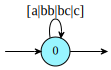

In [3]:
r.automaton()

Similarly, it is possible to define *weighted* transducers, as for weighted automata:

In [4]:
ctxw = vcsn.context("[ab] x [xy] -> Z")
ctxw

[ab]? × [xy]? → ℤ

In [5]:
r = ctxw.expression("(a|x)*((a|y)(b|x))*(b|y)*")
r

(a|x)*((a|y)(b|x))*(b|y)*

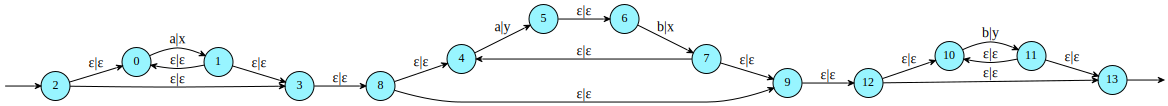

In [6]:
r.thompson()

This transducer transforms the *a*s at the beginning into *x*s, then *ab* into *yx*, then *b*s into *y*s. As you can see, transducers may have spontaneous transitions.

Keep in mind that while it is the common use-case, transducers are not limited to two tapes, but can have an arbitrary number of tapes. The notion of input tape and output tape becomes fuzzy, and the problem will have to be addressed in the algorithms' interface.